# 提取文本和图片特征

```bash
cd Chinese-CLIP/
export CUDA_VISIBLE_DEVICES=0
export PYTHONPATH=${PYTHONPATH}:`pwd`/cn_clip

split=valid # 指定计算valid或test集特征
resume=${DATAPATH}/pretrained_weights/clip_cn_vit-b-16.pt

python -u cn_clip/eval/extract_features.py \
    --extract-image-feats \
    --extract-text-feats \
    --image-data="${DATAPATH}/datasets/${dataset_name}/lmdb/${split}/imgs" \
    --text-data="${DATAPATH}/datasets/${dataset_name}/${split}_texts.jsonl" \
    --img-batch-size=32 \
    --text-batch-size=32 \
    --context-length=52 \
    --resume=${resume} \
    --vision-model=ViT-B-16 \
    --text-model=RoBERTa-wwm-ext-base-chinese
```

In [ ]:
!python -u cn_clip/eval/extract_features.py --extract-image-feats --extract-text-feats --image-data=.\datapath\/datasets/MUGE/lmdb/test/imgs --text-data=.\datapath\/datasets/MUGE/test_texts.jsonl --img-batch-size=256 --text-batch-size=256 --context-length=52 --resume=.\datapath\/experiments/muge_finetune_vit-b-16_roberta-base_bs160/checkpoints/epoch_latest.pt --vision-model=ViT-B-16 --text-model=RoBERTa-wwm-ext-base-chinese

In [ ]:
!python -u cn_clip/eval/make_topk_predictions.py --image-feats=.\datapath\/datasets/MUGE/test_imgs.img_feat.jsonl --text-feats=.\datapath\/datasets/MUGE/test_texts.txt_feat.jsonl --top-k=10 --eval-batch-size=32768 --output=.\datapath\/datasets/MUGE/test_predictions.jsonl

In [ ]:
!python cn_clip/eval/evaluation.py .\datapath\/datasets/MUGE/test_texts.jsonl .\datapath\/datasets/MUGE/test_predictions.jsonl recall_output_test.json

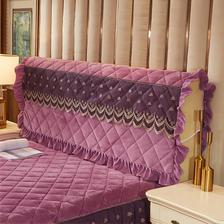

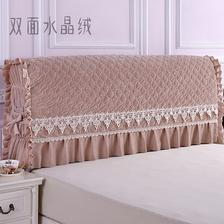

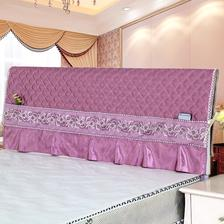

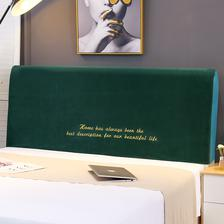

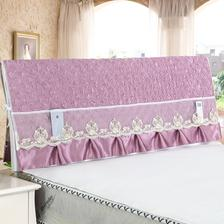

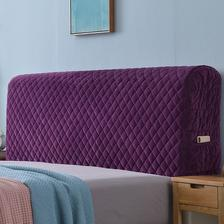

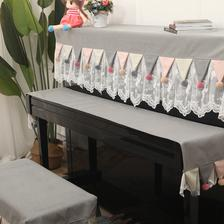

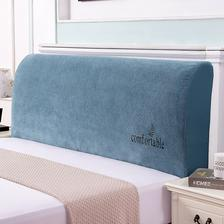

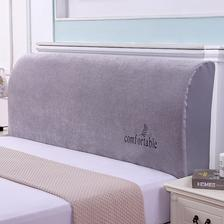

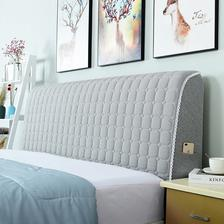

In [17]:
import lmdb
import base64
from io import BytesIO
from PIL import Image
from IPython import display

# {"text_id": 342160, "text": "金丝绒木床头罩", "image_ids": []}
{"text_id": 342160, "image_ids": [599057, 224560, 282239, 155774, 908966, 511583, 611578, 434528, 368883, 870348]}
image_ids = [599057, 224560, 282239, 155774, 908966, 511583, 611578, 434528, 368883, 870348] # 模型预测的top-5相关图片

lmdb_imgs = "./datapath/datasets/MUGE/lmdb/test/imgs"
env_imgs = lmdb.open(lmdb_imgs, readonly=True, create=False, lock=False, readahead=False, meminit=False)
txn_imgs = env_imgs.begin(buffers=True)
for image_id in image_ids:
    image_b64 = txn_imgs.get("{}".format(image_id).encode('utf-8')).tobytes()
    img = Image.open(BytesIO(base64.urlsafe_b64decode(image_b64)))
    # img.show()
    display.display(img)
    # break

# 展示图片的多种方式

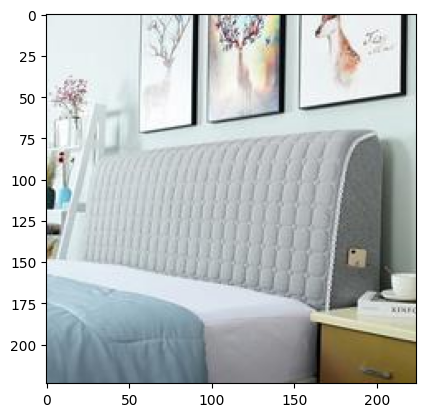

In [14]:
import matplotlib.pyplot as plt
plt.imshow(img)

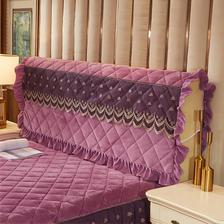

In [11]:
from IPython import display
display.display(img)